# Lab 11: Chess Board

## Overview  
This project is about constructing a chess board like its 1980. No prebuilt images just the power of arrays and pixel art.
## Feature Tasks and Requirements  
Your job is to render out chess boards with red and blue queens on them.

Chess board is an 8 by 8 grid of alternating black and white squares. The queens are red and blue squares.

Each board will have one red and one blue queen at different coordinates. In addition to displaying the board you’ll need to identify if the queens are “under attack” based on their coordinates.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Pre-defined colors for the board layout, as well as the queen colors.

In [2]:
# Colors
color_white = (1, 1, 1)
color_red = (1, .2, 0)
color_blue = (.1, .1, 1)

In [3]:
class ChessBoard:
    
    def __init__(self):
        self.grid = np.zeros((8,8,3))     
        self.x_positions = []
        self.y_positions = []

        for i in range(0, 8, 2):
            self.grid[i + 0][::2] = color_white
            self.grid[i + 1][1::2] = color_white

    def add_red(self, row, col):   
        self.grid[row, col] = color_red
        self.x_positions.append(col)
        self.y_positions.append(row)

    def add_blue(self, row, col):
        self.grid[row, col] = color_blue
        self.x_positions.append(col)
        self.y_positions.append(row)
    
    def is_under_attack(self):
        L1 = self.x_positions
        L2 = self.y_positions

        status = False

        for o in range(len(L1)):
            for j in range(o + 1, len(L2)):
                if abs(L1[o] - L1[j]) == abs(L2[o] - L2[j]):
                    status = True
                elif L1[o] == L1[j] or L2[o] == L2[j]:
                    status = True
                else:
                    continue
                break
            break
        return status

    def render(self):
        plt.imshow(self.grid)

    def clear_board(self):
        self.x_positions = []
        self.y_positions = []
        for i in range(0, 8, 2):
            self.grid[i + 0][::2] = color_white
            self.grid[i + 1][1::2] = color_white


### Rending a Blank Board:

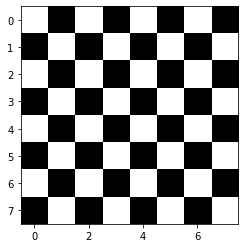

In [4]:
my_board = ChessBoard()
my_board.render()

### Adding a Red Queen and a Blue Queen:

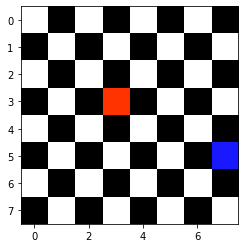

In [5]:
my_board.add_red(3, 3)
my_board.add_blue(5,7)
my_board.render()

### Checking if the the Queen's are under attack:

In [6]:
my_board.is_under_attack()

False

### Clearing the board, Resetting Queens, and checking if they are under attack:

True

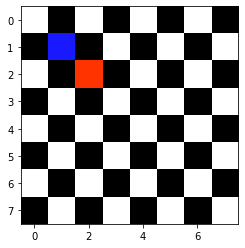

In [7]:
my_board.clear_board()
my_board.add_red(2,2)
my_board.add_blue(1,1)
my_board.render()
my_board.is_under_attack()

### User Acceptance Tests:

In [8]:
# Queens on the same row
my_board.clear_board()
my_board.add_red(0,1)
my_board.add_blue(0,5)
assert my_board.is_under_attack() == True

# Queens on the same column
my_board.clear_board()
my_board.add_red(1,5)
my_board.add_blue(7,5)
assert my_board.is_under_attack() == True

# Queens on the same diagonal
my_board.clear_board()
my_board.add_red(0,0)
my_board.add_blue(7,7)
assert my_board.is_under_attack() == True

# Queens with any other coordinates NOT under attack
my_board.clear_board()
my_board.add_red(0,0)
my_board.add_blue(4,7)
assert my_board.is_under_attack() == False